In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [2]:
dataset = pd.read_csv('../input/property-price-prediction-81-features/HousePrices.csv')
dataset

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,1936,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,1936,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,TA,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,321,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,TA,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,9,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [4]:
dataset.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr


 mu = 180967.284 and sigma = 78647.435



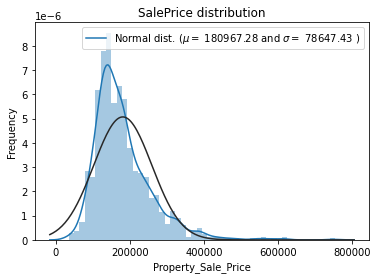

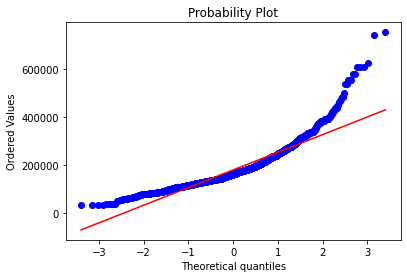

Skewness: 1.842123
kurtosis: 6.262967


In [6]:
sns.distplot(dataset['Property_Sale_Price'], fit=norm)

(mu,sigma)= norm.fit(dataset['Property_Sale_Price'])
print( '\n mu = {:.3f} and sigma = {:.3f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.figure()
stats.probplot(dataset['Property_Sale_Price'], plot=plt)
plt.show()

print("Skewness: %f" % dataset['Property_Sale_Price'].skew())
print('kurtosis: %f'% dataset['Property_Sale_Price'].kurt())

In [7]:
# From the distribution of the price variable we can see that its not that much skewed 
# but it have 1.8 skewed which is positive skewed so we can say that this target variable is distributed well

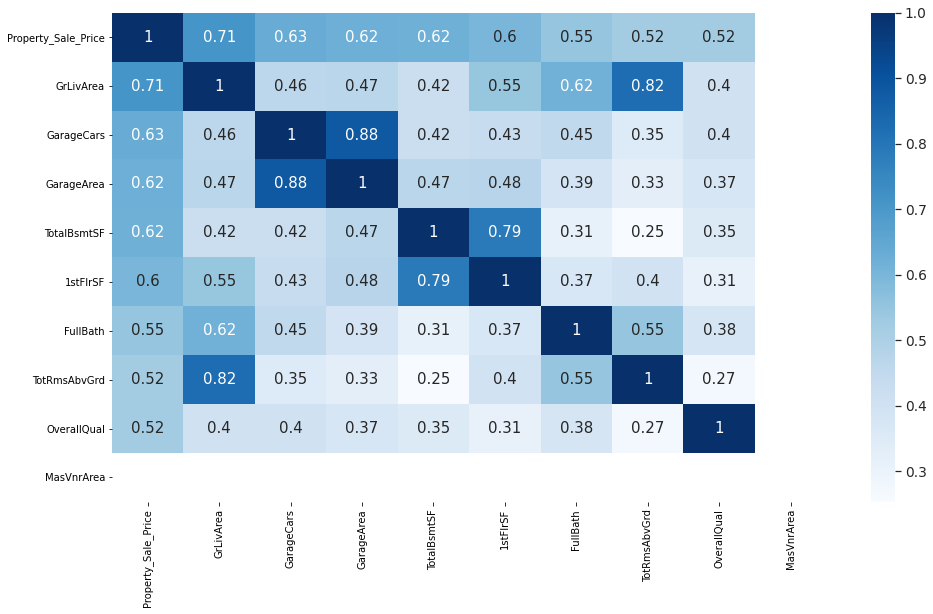

In [8]:
# top 10 columns
corr= dataset.corr()
k = 10
cols = corr.nlargest(k, 'Property_Sale_Price')['Property_Sale_Price'].index
cm= np.corrcoef(dataset[cols].values.T)
plt.subplots(figsize=(16,9))
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, annot= True, cmap='Blues',yticklabels=cols.values,xticklabels = cols.values)

plt.show()

In [9]:
most_corr = pd.DataFrame(cols, columns = ['Most correlated columns'])
most_corr

,Most correlated columns
0,Property_Sale_Price
1,GrLivArea
2,GarageCars
3,GarageArea
4,TotalBsmtSF
5,1stFlrSF
6,FullBath
7,TotRmsAbvGrd
8,OverallQual
9,MasVnrArea


### top 10 corr columns
Property_Sale_Price
1	GrLivArea
2	GarageCars
3	GarageArea
4	TotalBsmtSF
5	1stFlrSF
6	FullBath
7	TotRmsAbvGrd
8	OverallQual
9	MasVnrArea

In [10]:
# Creating function to view categorical with the target variable
def boxplt(var):
    data = pd.concat([dataset['Property_Sale_Price'],var], axis=1)
    plt.subplots(figsize=(16,9))
    fig = sns.boxplot(x=var, y = 'Property_Sale_Price', data = data)
    plt.show()

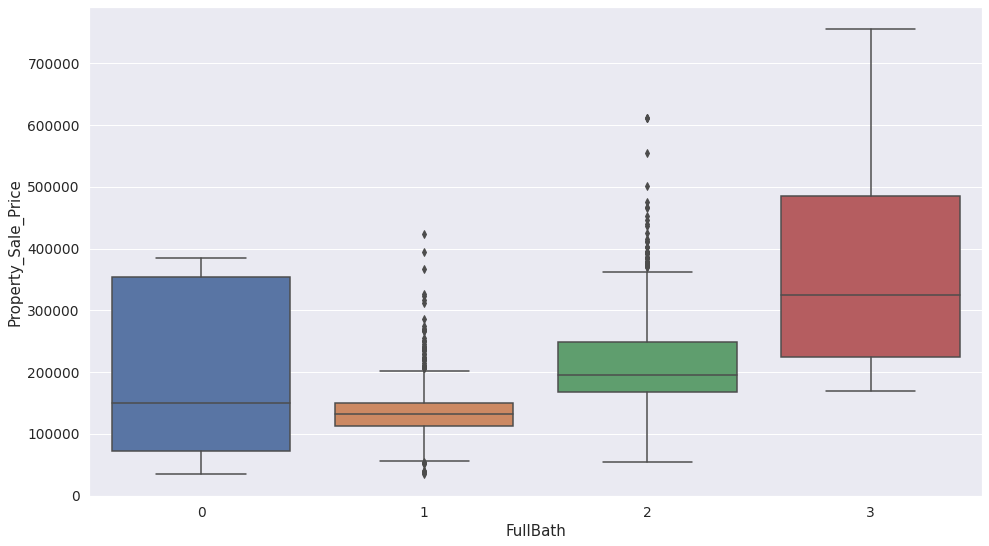

In [11]:
boxplt(dataset['FullBath'])

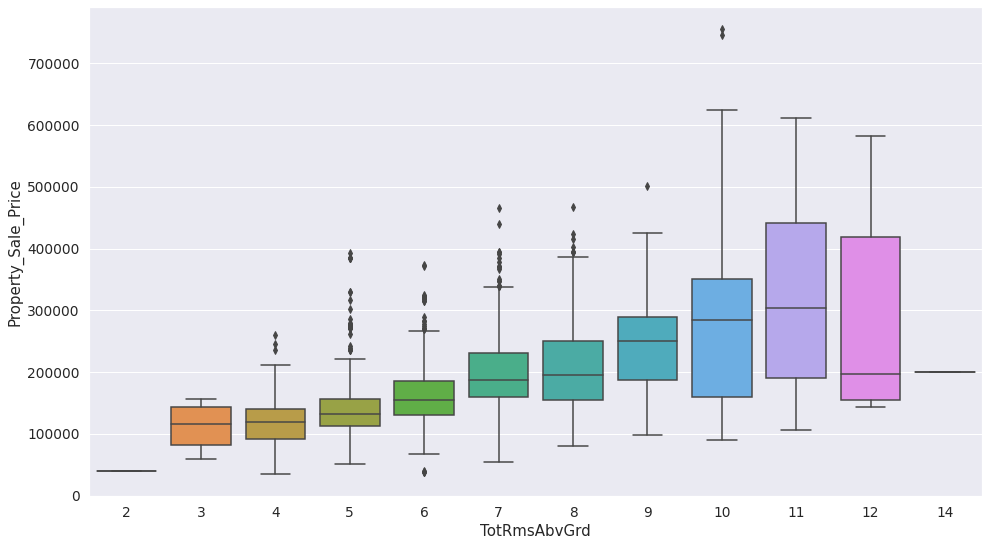

In [12]:
boxplt(dataset['TotRmsAbvGrd'])

In [13]:
# We dont want TotRmsAbvGrd which is below 3 and above 4 which as only one data on each
dataset.drop(dataset[(dataset['TotRmsAbvGrd']>12) | (dataset['TotRmsAbvGrd']<3)].index,inplace=True)

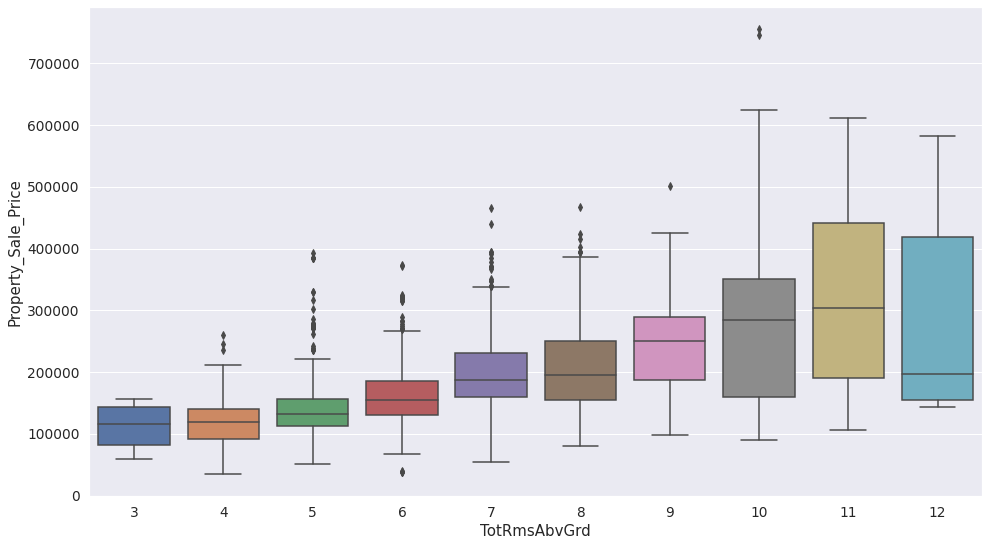

In [14]:
boxplt(dataset['TotRmsAbvGrd'])

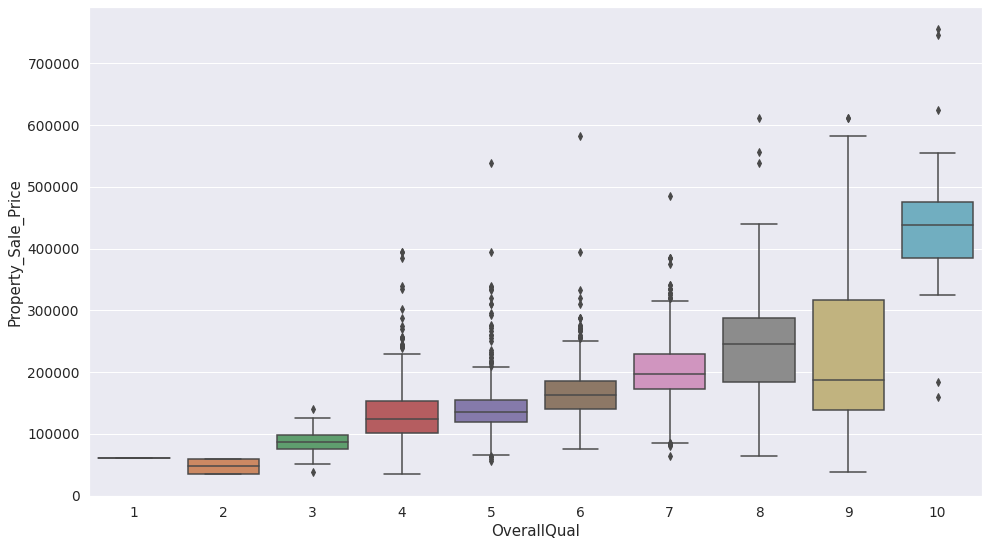

In [15]:
boxplt(dataset['OverallQual'])

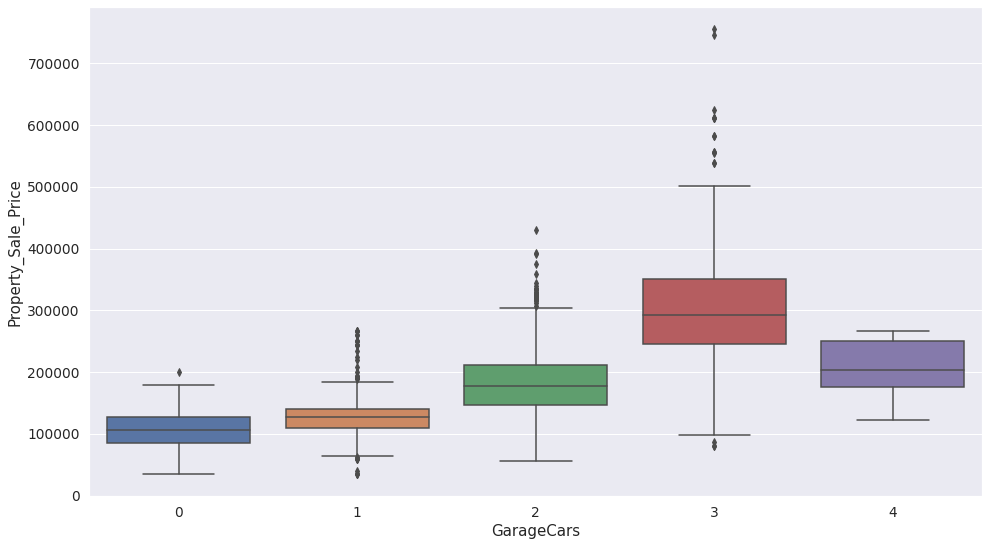

In [16]:
boxplt(dataset['GarageCars'])

In [17]:
dataset[(dataset['Property_Sale_Price']<300000) & (dataset['GarageCars']>3)]
# check for outliers where the sale price is lesser than 300000 but has 4 Garage

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309,Unf,0,35,1344,GasA,Ex,Y,SBrkr,1344,0,0,1344,2,0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4,784,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,Y,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
1759,1760,70,RM,65.0,9527,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,8,1938,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979


In [18]:
# checking correlation between continuous and target

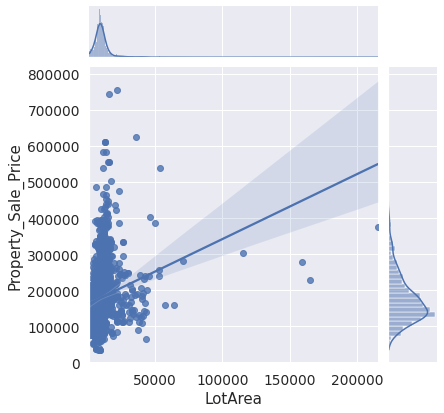

In [19]:
sns.jointplot(x=dataset['LotArea'], y= dataset['Property_Sale_Price'],kind='reg')
plt.show( )

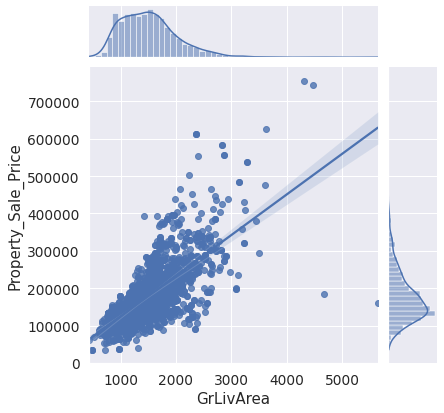

In [20]:
sns.jointplot(x=dataset['GrLivArea'], y= dataset['Property_Sale_Price'],kind='reg')
plt.show()

In [21]:
# Removing outliers manually (Two points in the bottom right)
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) 
                         & (dataset['Property_Sale_Price']<300000)].index).reset_index(drop=True)

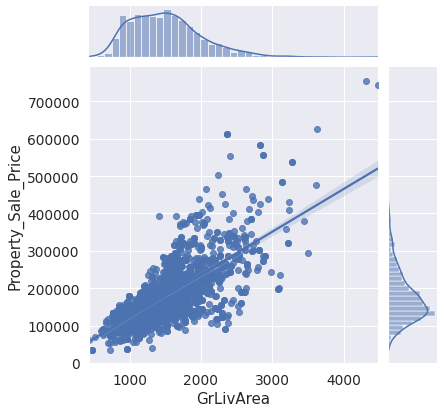

In [22]:
sns.jointplot(x=dataset['GrLivArea'], y= dataset['Property_Sale_Price'],kind='reg')
plt.show()

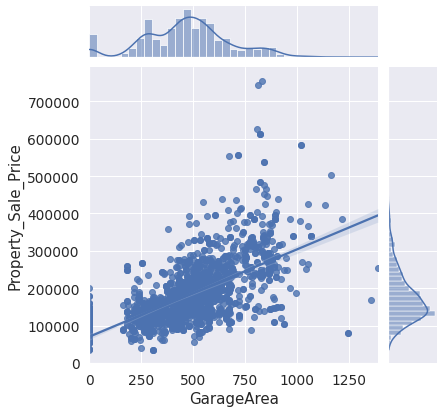

In [23]:
sns.jointplot(x= dataset['GarageArea'],y = dataset['Property_Sale_Price'],kind='reg')

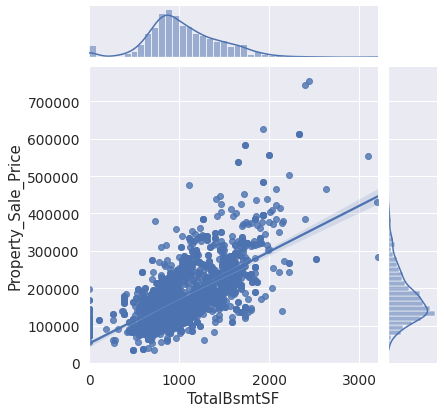

In [24]:
sns.jointplot(x= dataset['TotalBsmtSF'],y = dataset['Property_Sale_Price'],kind='reg')

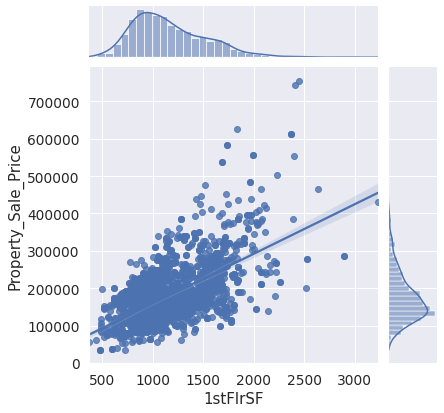

In [25]:
sns.jointplot(x= dataset['1stFlrSF'],y = dataset['Property_Sale_Price'],kind='reg')

In [26]:
dataset.groupby('GarageCars').sum()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
GarageCars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,99438,8100,6469.0,903867,562,648,216068,219773,1366.0,30689,1629,55052,87370,102789,27512,3343,133644,45,5,151,23,322,137,670,12,0.0,0,4503,3512,4146,0,0,0,4750,703,222878,11784550
1,453660,24785,28078.0,4709657,2841,3131,994146,1006136,19613.0,173094,34681,234203,441978,498027,118067,2619,618713,179,33,577,116,1423,517,2975,215,998344.0,154164,32837,10794,19016,320,6723,576,40390,3114,1024006,65396330
2,1100018,79955,69909.0,13215329,7523,6840,2338867,2356167,116018.0,535295,61584,644279,1241158,1401858,429975,5738,1837571,522,70,1998,511,3379,1249,7752,773,2351224.0,612849,116478,60330,16786,5248,19751,3155,36114,7453,2377338,216830127
3,236221,11833,20937.0,3188693,1936,1423,513989,516302,70490.0,157663,4138,231182,392983,397225,131240,572,529037,137,8,516,129,797,266,2074,241,516222.0,209387,40171,19988,2875,608,3693,555,1120,1711,517977,79320865
4,6812,530,369.0,80687,33,34,11716,11919,717.0,2968,0,4211,7179,7816,3936,0,11752,4,1,8,4,22,8,48,3,11815.0,5316,801,0,772,0,0,0,0,38,12049,1229258


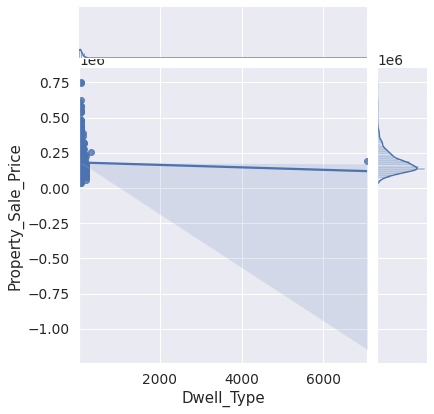

In [27]:
sns.jointplot(x= dataset['Dwell_Type'],y = dataset['Property_Sale_Price'],kind='reg')
plt.show()

In [28]:
dataset['Dwell_Type'] = dataset.drop(dataset[dataset['Dwell_Type']>300].index)

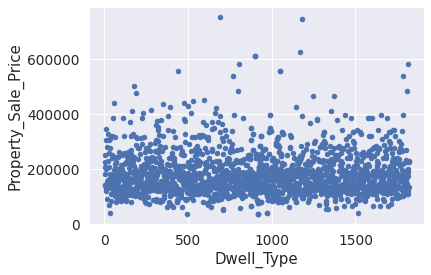

In [29]:
dataset.plot.scatter(x='Dwell_Type', y='Property_Sale_Price')
plt.show()

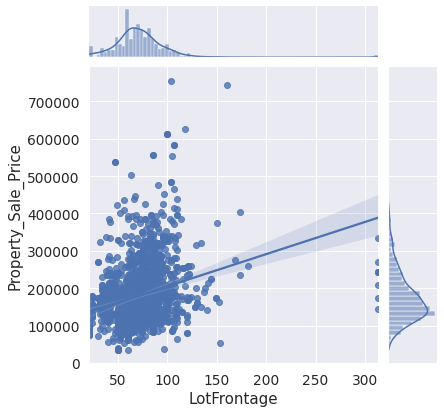

In [30]:
sns.jointplot(x= dataset['LotFrontage'],y = dataset['Property_Sale_Price'],kind='reg')
plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='Property_Sale_Price'>

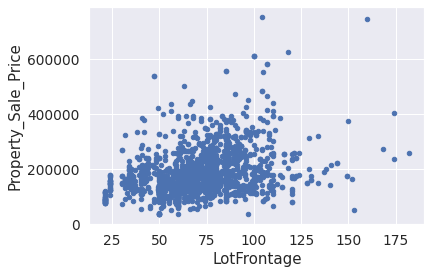

In [31]:
#Droping the outlier values
dataset = dataset.drop(dataset[dataset['LotFrontage']>250].index)
dataset.plot.scatter('LotFrontage','Property_Sale_Price')

In [32]:
# Getting Object variable with na values to impute them
dataset[dataset.select_dtypes(include=['object']).columns].isna().sum().sort_values(ascending=False)

PoolQC            2054
MiscFeature       1981
Alley             1933
Fence             1657
FireplaceQu        985
GarageCond         111
GarageQual         111
GarageFinish       111
GarageType         111
BsmtExposure        60
BsmtFinType2        59
BsmtQual            58
BsmtFinType1        58
BsmtCond            58
MasVnrType          14
Dwell_Type           2
Electrical           1
Exterior2nd          0
SaleType             0
Road_Type            0
Property_Shape       0
LandContour          0
PavedDrive           0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Functional           0
KitchenQual          0
Exterior1st          0
CentralAir           0
HeatingQC            0
Heating              0
Condition2           0
Dwelling_Type        0
HouseStyle           0
RoofStyle            0
Zone_Class           0
Foundation           0
ExterCond            0
ExterQual            0
RoofMatl             0
SaleConditi

In [33]:
dataset.isna().sum().sort_values(ascending=False)

PoolQC                 2054
MiscFeature            1981
Alley                  1933
Fence                  1657
FireplaceQu             985
                       ... 
TotalBsmtSF               0
Heating                   0
CentralAir                0
1stFlrSF                  0
Property_Sale_Price       0
Length: 81, dtype: int64

In [34]:
dataset= dataset.drop(dataset[['Road_Type','Alley','Utilities','PoolQC','Fence','MiscFeature','MoSold','MiscVal']],axis=1)

In [35]:
objcol = dataset[dataset.select_dtypes(include=['object']).columns].isna().sum().sort_values(ascending=False)
objcol=objcol.drop(objcol[objcol.values==0].index)
objcol = objcol.index
objcol

Index(['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond',
       'MasVnrType', 'Dwell_Type', 'Electrical'],
      dtype='object')

In [36]:
# These are the column which as na values and dtype object

In [37]:
dataset['Electrical'].value_counts()

SBrkr    1891
FuseA     126
FuseF      39
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
dataset['Electrical'].fillna('SBrkr', inplace=True)
dataset['Electrical'].isna().sum()

0

In [39]:
# since these nan are not really na. it means that in this dataset na represent that the feature is not present in the propert
# so instead removing them we imputing them with none values
pd.set_option('display.max_rows',100)
ds1 =  dataset.copy()
ds1[objcol] = ds1[objcol].apply(lambda x : x.fillna('None'))
ds1.isna().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
Property_Shape           0
LandContour              0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
Dwelling_Type            0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea              14
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
Heating                  0
H

In [40]:
#since most of the house property likely to have a similar area 
ds1["LotFrontage"] = ds1.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [41]:
ds1['GarageYrBlt'].fillna(0,inplace=True)
ds1['MasVnrArea'].fillna(0,inplace=True)
ds1.isna().sum()

Id                     0
Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Property_Shape         0
LandContour            0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0
Electrical             0


In [42]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2068
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2061 non-null   int64  
 1   Dwell_Type           2061 non-null   object 
 2   Zone_Class           2061 non-null   object 
 3   LotFrontage          2061 non-null   float64
 4   LotArea              2061 non-null   int64  
 5   Property_Shape       2061 non-null   object 
 6   LandContour          2061 non-null   object 
 7   LotConfig            2061 non-null   object 
 8   LandSlope            2061 non-null   object 
 9   Neighborhood         2061 non-null   object 
 10  Condition1           2061 non-null   object 
 11  Condition2           2061 non-null   object 
 12  Dwelling_Type        2061 non-null   object 
 13  HouseStyle           2061 non-null   object 
 14  OverallQual          2061 non-null   int64  
 15  OverallCond          2061 non-null   i

In [43]:
#We have two conditions of the house may be we can encode them and add them together to get more results
Cond1= pd.get_dummies(ds1['Condition1'])
Cond2= pd.get_dummies(ds1['Condition2'])
condition= Cond1+Cond2
condition['RRNe']=Cond1['RRNe']
condition

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,0,0,2,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2063,0,0,2,0,0,0,0,0,0
2064,0,0,1,0,0,0,0,0,1
2065,0,0,2,0,0,0,0,0,0
2067,0,0,2,0,0,0,0,0,0


In [44]:
#likewise we have two exteriors, hence doing the same as conditions
ext1=pd.get_dummies(ds1['Exterior1st'])
ext2= pd.get_dummies(ds1['Exterior2nd'])
ext2.rename(columns={'Brk Cmn':'BrkComm','CmentBd':'CemntBd','Wd Sdng':'Wd Sdng','Wd Shng':'WdShing'},inplace=True)
exterior = ext1+ext2
exterior['Other']=ext2['Other']
exterior

,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2064,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
2065,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
2067,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [45]:
ds2=ds1.copy()
ds2['Dwell_Type']=ds2['Dwell_Type'].astype(str)
one_hot=pd.get_dummies(ds2[['Dwell_Type','Zone_Class','LandContour','LotConfig','Neighborhood','Dwelling_Type','RoofStyle',
                           'RoofMatl','MasVnrType','Electrical','Functional','GarageType','PavedDrive','SaleType',
                            'SaleCondition','Heating']])
one_hot

,Dwell_Type_1.0,Dwell_Type_10.0,Dwell_Type_100.0,Dwell_Type_1000.0,Dwell_Type_1001.0,Dwell_Type_1002.0,Dwell_Type_1003.0,Dwell_Type_1004.0,Dwell_Type_1005.0,Dwell_Type_1006.0,Dwell_Type_1007.0,Dwell_Type_1008.0,Dwell_Type_1009.0,Dwell_Type_101.0,Dwell_Type_1010.0,Dwell_Type_1011.0,Dwell_Type_1012.0,Dwell_Type_1013.0,Dwell_Type_1014.0,Dwell_Type_1015.0,Dwell_Type_1016.0,Dwell_Type_1017.0,Dwell_Type_1018.0,Dwell_Type_1019.0,Dwell_Type_102.0,Dwell_Type_1020.0,Dwell_Type_1021.0,Dwell_Type_1022.0,Dwell_Type_1023.0,Dwell_Type_1024.0,Dwell_Type_1025.0,Dwell_Type_1026.0,Dwell_Type_1027.0,Dwell_Type_1028.0,Dwell_Type_1029.0,Dwell_Type_103.0,Dwell_Type_1030.0,Dwell_Type_1031.0,Dwell_Type_1032.0,Dwell_Type_1033.0,Dwell_Type_1034.0,Dwell_Type_1035.0,Dwell_Type_1036.0,Dwell_Type_1037.0,Dwell_Type_1038.0,Dwell_Type_1039.0,Dwell_Type_104.0,Dwell_Type_1040.0,Dwell_Type_1041.0,Dwell_Type_1042.0,...,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [46]:
features=['Property_Shape', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir',  'KitchenQual','FireplaceQu','GarageFinish', 'GarageQual',
       'GarageCond',]
for col in features:
    print(ds2[col].unique())


['Reg' 'IR1' 'IR2' 'IR3']
['Gtl' 'Mod' 'Sev']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
['Gd' 'TA' 'Ex' 'None' 'Fa']
['TA' 'Gd' 'None' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'None']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Y' 'N']
['Gd' 'TA' 'Ex' 'Fa']
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['RFn' 'Unf' 'Fin' 'None']
['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']


In [47]:
clean_col = {'Property_Shape':{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
            'LandSlope':{'Gtl':3, 'Mod':2, 'Sev':1},
            'HouseStyle':{'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':5, 'SLvl':6, '2.5Unf':7, '2.5Fin':8},
            'ExterQual':{'Gd':3, 'TA':2, 'Ex':4, 'Fa':1},
            'ExterCond':{'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5},
            'BsmtQual':{'Gd':3, 'TA':2, 'Ex':4, 'None':0, 'Fa':1},
            'BsmtCond':{'TA':3, 'Gd':4, 'None':0, 'Fa':2, 'Po':1},
            'BsmtExposure':{'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'None':0},
            'BsmtFinType1':{'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'None':0, 'LwQ':2},
            'BsmtFinType2':{'Unf':1, 'BLQ':4, 'None':0, 'ALQ':5, 'Rec':3, 'LwQ':2, 'GLQ':6},
            'HeatingQC':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'CentralAir':{'Y':1, 'N':0},
            'KitchenQual':{'Gd':3, 'TA':2, 'Ex':4, 'Fa':1},
            'FireplaceQu':{'None':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1},
            'GarageFinish':{'RFn':2, 'Unf':1, 'Fin':3, 'None':0},
            'GarageQual':{'TA':3, 'Fa':2, 'Gd':4, 'None':0, 'Ex':5, 'Po':1},
            'GarageCond':{'TA':3, 'Fa':2, 'None':0, 'Gd':4, 'Po':1, 'Ex':5},
            'Foundation':{'PConc':4, 'CBlock':5, 'BrkTil':6, 'Wood':1, 'Slab':3, 'Stone':2}
            }
ds2.replace(clean_col,inplace=True)

In [48]:
ds3=ds2.copy()
ds4 = ds3.drop(ds3[['Dwell_Type','Zone_Class','LandContour','LotConfig','Neighborhood','Dwelling_Type','RoofStyle','RoofMatl',
                    'MasVnrType','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Condition1',
                    'Condition2','Heating','Exterior1st','Exterior2nd']],axis=1)

In [49]:
pd.set_option('display.max_columns',250)
frames = [ds4,one_hot,exterior,condition]
#frames = [ds6,one_hot,exter,cond]
ds5=pd.concat(frames,axis=1)

In [50]:
cols = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
ds5[cols]= ds5[cols].apply(lambda x: x.astype(str))
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds5[cols]= ds5[cols].apply(lambda x: le.fit_transform(x), result_type='expand' )

In [51]:
ds5

,Id,LotFrontage,LotArea,Property_Shape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,Property_Sale_Price,Dwell_Type_1.0,Dwell_Type_10.0,Dwell_Type_100.0,Dwell_Type_1000.0,Dwell_Type_1001.0,Dwell_Type_1002.0,Dwell_Type_1003.0,Dwell_Type_1004.0,Dwell_Type_1005.0,Dwell_Type_1006.0,Dwell_Type_1007.0,Dwell_Type_1008.0,Dwell_Type_1009.0,Dwell_Type_101.0,Dwell_Type_1010.0,Dwell_Type_1011.0,Dwell_Type_1012.0,Dwell_Type_1013.0,Dwell_Type_1014.0,Dwell_Type_1015.0,Dwell_Type_1016.0,Dwell_Type_1017.0,Dwell_Type_1018.0,Dwell_Type_1019.0,Dwell_Type_102.0,Dwell_Type_1020.0,Dwell_Type_1021.0,Dwell_Type_1022.0,Dwell_Type_1023.0,Dwell_Type_1024.0,Dwell_Type_1025.0,Dwell_Type_1026.0,Dwell_Type_1027.0,Dwell_Type_1028.0,Dwell_Type_1029.0,Dwell_Type_103.0,Dwell_Type_1030.0,Dwell_Type_1031.0,Dwell_Type_1032.0,Dwell_Type_1033.0,Dwell_Type_1034.0,Dwell_Type_1035.0,Dwell_Type_1036.0,Dwell_Type_1037.0,Dwell_Type_1038.0,Dwell_Type_1039.0,Dwell_Type_104.0,Dwell_Type_1040.0,Dwell_Type_1041.0,Dwell_Type_1042.0,Dwell_Type_1043.0,Dwell_Type_1044.0,Dwell_Type_1045.0,Dwell_Type_1046.0,Dwell_Type_1047.0,Dwell_Type_1048.0,Dwell_Type_1049.0,Dwell_Type_105.0,Dwell_Type_1050.0,Dwell_Type_1051.0,Dwell_Type_1052.0,Dwell_Type_1053.0,Dwell_Type_1054.0,Dwell_Type_1055.0,Dwell_Type_1056.0,Dwell_Type_1057.0,Dwell_Type_1058.0,Dwell_Type_1059.0,Dwell_Type_106.0,Dwell_Type_1060.0,Dwell_Type_1061.0,Dwell_Type_1062.0,...,Zone_Class_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Dwelling_Type_1Fam,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,1,65.0,8450,4,3,4,7,5,109,53,196.0,3,3,4,3,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,89,2,2,548,3,3,0,61,0,0,0,0,2,208500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [52]:
# Now we convert the object type into numerics using factorise 

In [53]:
x = ds5.drop(['Id','Property_Sale_Price'],1)
y= ds5['Property_Sale_Price']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 1)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [57]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
y_pred_rf = model_rf.predict(x_test)
y_pred_lr = model_lr.predict(x_test)

In [59]:
y_actual = y_test.reset_index()
y_actual.drop('index',axis=1,inplace=True)
y_actual['Predicted_LR']= y_pred_lr
y_actual['Predicted_RF']= y_pred_rf
y_actual

,Property_Sale_Price,Predicted_LR,Predicted_RF
0,267000,246693.931103,287832.32
1,172500,196281.623074,201074.00
2,295000,255958.360543,312030.40
3,142000,174637.723299,147654.96
4,228000,235745.609616,232593.08
...,...,...,...
511,180000,180000.000000,179725.65
512,98300,89424.364879,107136.96
513,297000,285909.025827,319741.27
514,383970,338766.623964,375808.45


In [60]:
from sklearn import metrics

In [61]:
print(metrics.r2_score(y_test,y_pred_lr))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))


0.8761470548061056
MAE:  15255.014088253936
MSE:  774848160.0269161
RMSE: 27836.09455413809


In [62]:
print(metrics.r2_score(y_test,y_pred_rf))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

0.935952274668638
MAE:  12193.634205426357
MSE:  400695050.48283434
RMSE: 20017.368720259772


In [63]:
#accuracies using k-fold cross validation for the model which performed well
from sklearn.model_selection import cross_val_score

In [64]:
acq = cross_val_score(model_rf,x_train,y_train,cv=10)
acq

array([0.90044332, 0.91661532, 0.82389666, 0.92083713, 0.9227309 ,
       0.91596207, 0.94309118, 0.925706  , 0.91326364, 0.91314708])

In [65]:
print(acq.mean())
print(acq.std())

0.9095693299411058
0.030371613845176282


In [66]:
from sklearn.linear_model import Lasso,Ridge

In [67]:
ls = Lasso(fit_intercept=True).fit(x_train,y_train)
rd = Ridge().fit(x_train,y_train)

In [68]:
acqls=cross_val_score(ls,x_train,y_train, cv=10)
acqrd = cross_val_score(rd,x_train,y_train, cv=10)

In [69]:
print(acqls.mean())
print(acqrd.mean())

0.7940002128876008
0.8867093684519649


In [70]:
# hence the Random Forest Regressor performs well in this dataset. 